In [1]:
import time

from numpy import extract

start = time.time()

import os
import json

os.system('cls')

print("Modules importation :\n")
print(f"{'    Standard modules' :-<50}", end="")
import pathlib
import numpy as np
import matplotlib.pyplot as plt

print(" Done\n")

print(f"{'    Tensorflow modules' :-<50}", end="")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

print(" Done\n")

sh: cls: command not found


Modules importation :

    Standard modules------------------------------ Done

    Tensorflow modules---------------------------- Done



In [2]:
print('Loading data : \n')

data_path = os.path.join('dataset')

data_dir = pathlib.Path(f'{data_path}/training')
val_dir = pathlib.Path(f'{data_path}/validation')

image_count_dat = len(list(data_dir.glob('*/*.*')))
print(f'    Dataset images    : {image_count_dat}')
image_count_val = len(list(val_dir.glob('*/*.*')))
print(f'    Validation images : {image_count_val}')

Loading data : 

    Dataset images    : 8732
    Validation images : 4650


Preprocessing data :

Found 8723 files belonging to 903 classes.
Using 6979 files for training.
Found 4644 files belonging to 443 classes.
Using 928 files for validation.


2023-10-17 00:37:15.379995: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-17 00:37:15.946736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile



    Class names : ['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alcremie', 'Alolan Sandslash', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Anorith', 'Appletun', 'Applin', 'Araquanid', 'Arbok', 'Arcanine', 'Arceus', 'Archen', 'Archeops', 'Arctovish', 'Arctozolt', 'Ariados', 'Armaldo', 'Aromatisse', 'Aron', 'Arrokuda', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette', 'Barbaracle', 'Barboach', 'Barraskewda', 'Basculin', 'Bastiodon', 'Bayleef', 'Beartic', 'Beautifly', 'Beedrill', 'Beheeyem', 'Beldum', 'Bellossom', 'Bellsprout', 'Bergmite', 'Bewear', 'Bibarel', 'Bidoof', 'Binacle', 'Bisharp', 'Blacephalon', 'Blastoise', 'Blaziken', 'Blipbug', 'Blissey', 'Blitzle', 'Boldore', 'Boltund', 'Bonsly', 'Bouffalant', 'Bounsweet', 'Braixen', 'Braviary', 'Breloom', 'Brionne', 'Bronzong', 'Bronzor', 'Bruxish', 'Budew', 'Buizel', 'Bulbasaur', 'Buneary', '

2023-10-17 00:37:16.392991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


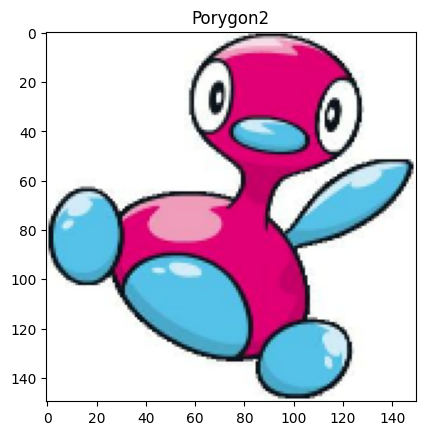

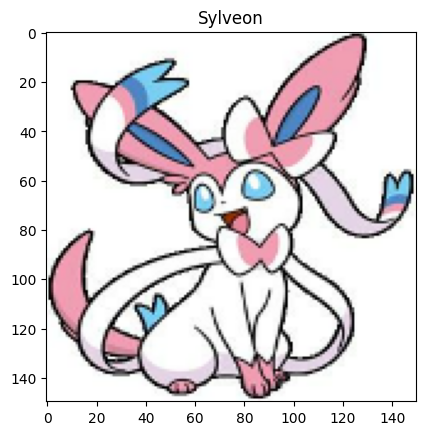

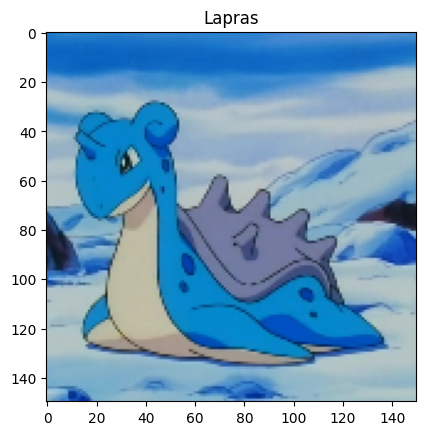

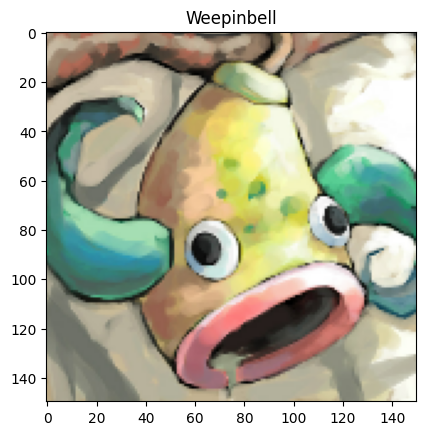

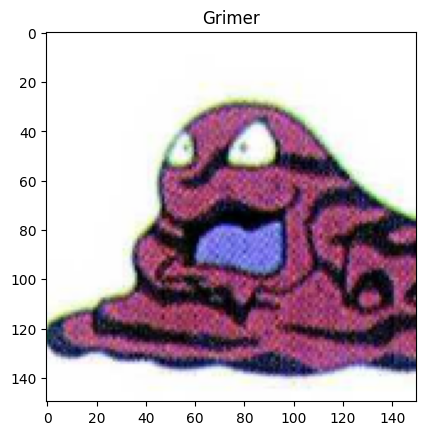

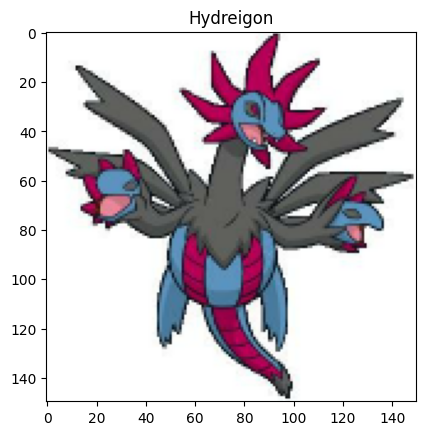

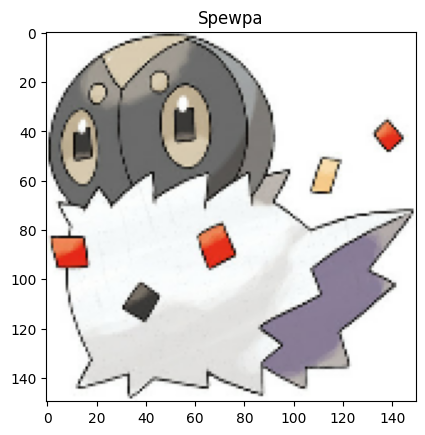

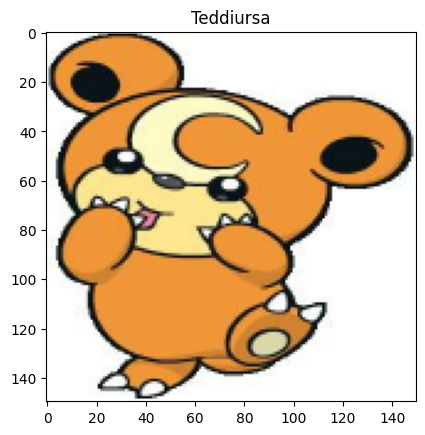

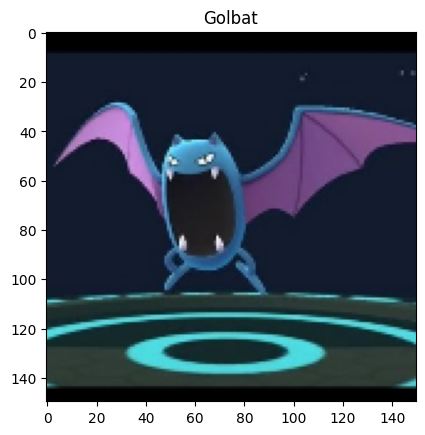

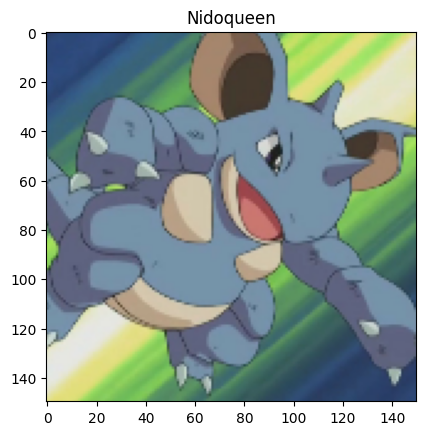

In [3]:
print('Preprocessing data :\n')

batch_size = 128
img_height = 150
img_width = 150

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=710,
    image_size=(img_height, img_width),
    interpolation = "bilinear",
    labels = "inferred",
    label_mode = "int",
    class_names = None,
    color_mode = "rgb",
    batch_size=batch_size)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=0.2,
    subset="validation",
    seed=710,
    image_size=(img_height, img_width),
    interpolation = "bilinear",
    labels = "inferred",
    label_mode = "int",
    class_names = None,
    color_mode = "rgb",
    batch_size=batch_size)

class_names = train_data.class_names
iter_train = iter(train_data)
iter_val = iter(val_data)
first_train = next(iter_train)
print(f'\n    Class names : {class_names}')

index = first_train[1].numpy()

for i in range(10):
    image = first_train[0][i]
    plt.figure()
    plt.imshow(image.numpy().astype(np.int64))
    plt.title(class_names[index[i]])

# Create a dictionary with initial values of 0
pokemon_data = {name: index for index, name in enumerate(class_names, start=0)}

# Save the dictionary to a JSON file
with open('pokemon_indices.json', 'w') as json_file:
    json.dump(pokemon_data, json_file, indent= 4)

print("JSON file 'pokemon_indices.json' created")

In [4]:
nb_classes = 903
model_name = "pokemon_recognition.h5"

if os.path.exists(model_name):
    model = load_model(model_name)
    os.remove(model_name)
else:
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(nb_classes, activation='softmax')
    ])

opt = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.build((None, img_height, img_width, 3))
print(model.summary())

logdir = f'logs/{model_name}'

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dropout (Dropout)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               89719296  
                                                                 
 dense_1 (Dense)             (None, 903)               463239    
                                                        

In [5]:
model.fit(train_data, validation_data=val_data, epochs = 1, callbacks=[tensorboard_callback])

2023-10-17 00:37:20.421369: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2023-10-17 00:37:20.951038: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/55 [..............................] - ETA: 2:17 - loss: 5.4188 - accuracy: 0.0703

2023-10-17 00:37:22.375952: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 3/55 [>.............................] - ETA: 58s - loss: 5.4057 - accuracy: 0.0729

2023-10-17 00:37:24.659715: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


17/55 [========>.....................] - ETA: 36s - loss: 5.3346 - accuracy: 0.0823

2023-10-17 00:37:37.518847: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/55 [==============================] - ETA: 0s - loss: 5.2944 - accuracy: 0.0941

2023-10-17 00:38:17.937706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/55 [==============================] - 94s 2s/step - loss: 5.2944 - accuracy: 0.0941 - val_loss: 12.6456 - val_accuracy: 0.0000e+00


2023-10-17 00:38:53.792838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 0s 60ms/step


Text(0.5, 1.0, 'Vaporeon')

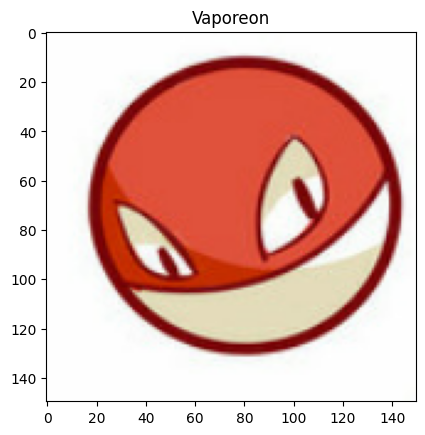

In [6]:
first_val = next(iter_val)

pred = model.predict(first_val[0])

image = first_val[0][0]

score = tf.nn.softmax(pred[0])

plt.figure()
plt.imshow(image.numpy().astype(np.int64))
plt.title(class_names[np.argmax(score)])

In [7]:
print(f'\nProcessing complete (time : {round(time.time() - start, 4)}s)')
plt.show()


Processing complete (time : 102.1988s)


In [10]:
if os.path.exists(model_name):
    model = load_model(model_name)

In [11]:
model.save(model_name)